In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from Marc_Project_3_Module_v2 import TCSI
from Linear_regression import linear_regression
from Linear_regression_plot import linear_regression_plot

In [8]:
df1 = pd.DataFrame(pd.read_csv('combined.csv'))
df2 = pd.DataFrame(pd.read_csv('metro_kpi.csv'))
df = pd.merge(df1, df2, on='Date', how='outer')
df['Date'] = pd.to_datetime(df['Date'])
df['ElevatorAvail'] = df['ElevatorAvail'].str.rstrip('%').astype('float')
df['ElevatorAvail'] = df['ElevatorAvail'] /100
df.head()
#dfc = df.dropna(how='any', inplace=False)
#dfc.head()

,Date,Metro,Bus,Taxi,Uber,ROTP,RailReliability,MetroAccessOTP,EscalatorAvail,ElevatorAvail,TotalInjuries,Crime
0,2011-01-01,21.08,NaN,NaN,NaN,0.879,48241.0,0.901,0.888,0.963,2.08,6.39
1,2011-02-01,21.23,NaN,NaN,NaN,0.887,37703.0,0.890,0.866,0.960,1.66,4.68
2,2011-03-01,26.17,NaN,NaN,NaN,0.910,50328.0,0.913,0.869,0.969,2.16,3.96
3,2011-04-01,25.66,NaN,NaN,NaN,0.909,39302.0,0.912,0.862,0.964,2.21,4.72
4,2011-05-01,24.34,NaN,NaN,NaN,0.909,37355.0,0.922,0.825,0.974,1.69,7.32


In [3]:
features = [column for column in df]
features

['Date',
 'Metro',
 'Bus',
 'Taxi',
 'Uber',
 'ROTP',
 'RailReliability',
 'MetroAccessOTP',
 'EscalatorAvail',
 'ElevatorAvail',
 'TotalInjuries',
 'Crime']

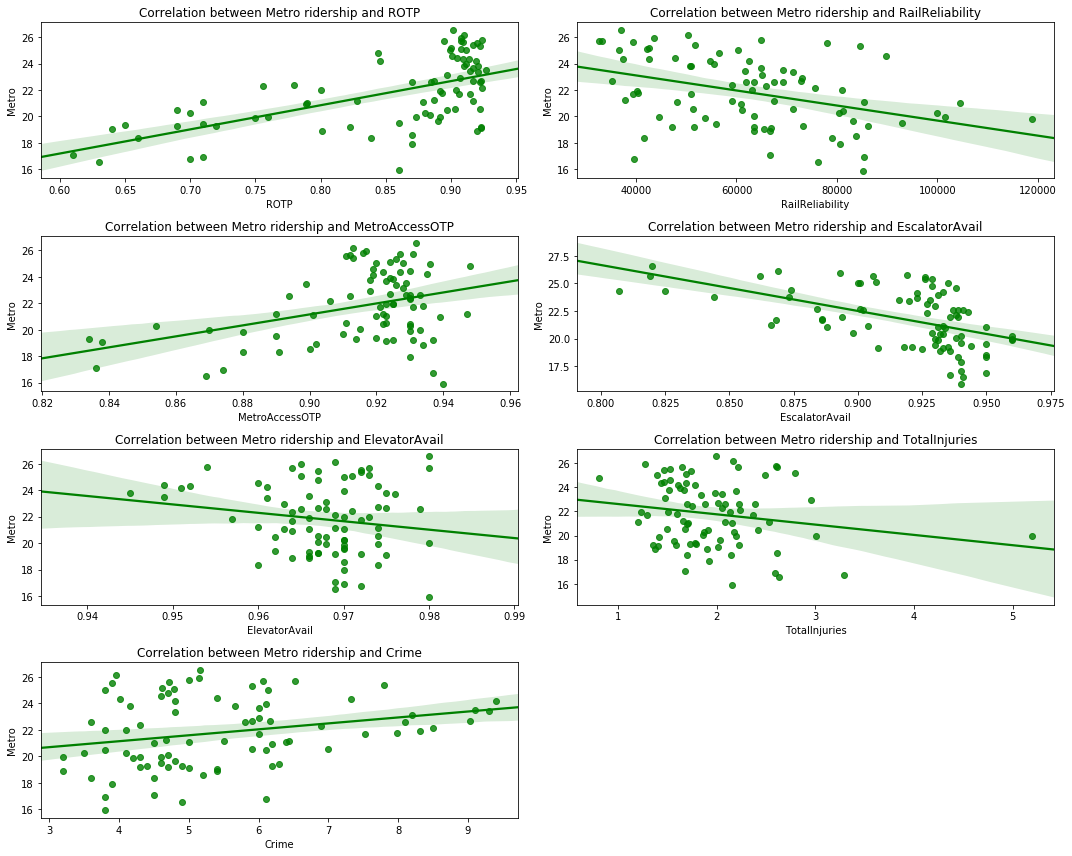

In [13]:
plt.figure(figsize=(15,12))
x = 1
for feature in features:
    if (feature != 'Date') & (feature != 'Bus') & (feature != 'Metro') & (feature != 'Taxi') & (feature != 'Uber') & (feature != 'Year') & (feature != 'Month'):
        plt.subplot(4,2,x)
        sns.regplot(data=df, x=df[feature], y=df['Metro'], color='g')
        plt.title(f'Correlation between Metro ridership and {feature}')
        x += 1
plt.tight_layout()
plt.savefig('../../Report/Question_2/PNG/KPI_ridership_correlation.png')

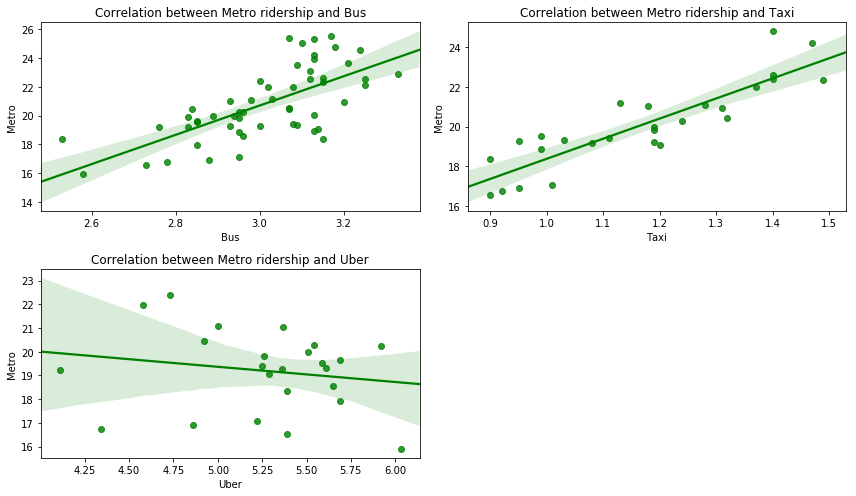

In [23]:
plt.figure(figsize=(12,7))
x = 1
for feature in features:
    if (feature == 'Bus') | (feature == 'Taxi') | (feature == 'Uber'):
        plt.subplot(2,2,x)
        sns.regplot(x=df[feature], y=df['Metro'], color='g')
        plt.title(f'Correlation between Metro ridership and {feature}')
        x += 1
plt.tight_layout()
plt.savefig('../../Report/Question_2/PNG/transport_ridership_correlation.png')

In [17]:
masks = []
masks.extend((1, ~np.isnan(df['Metro']), ~np.isnan(df['Bus']), ~np.isnan(df['Taxi']), ~np.isnan(df['Uber']),
             ~np.isnan(df['ROTP']), ~np.isnan(df['RailReliability']), ~np.isnan(df['MetroAccessOTP']),
             ~np.isnan(df['EscalatorAvail']), ~np.isnan(df['ElevatorAvail']), ~np.isnan(df['TotalInjuries']),
             ~np.isnan(df['Crime'])))


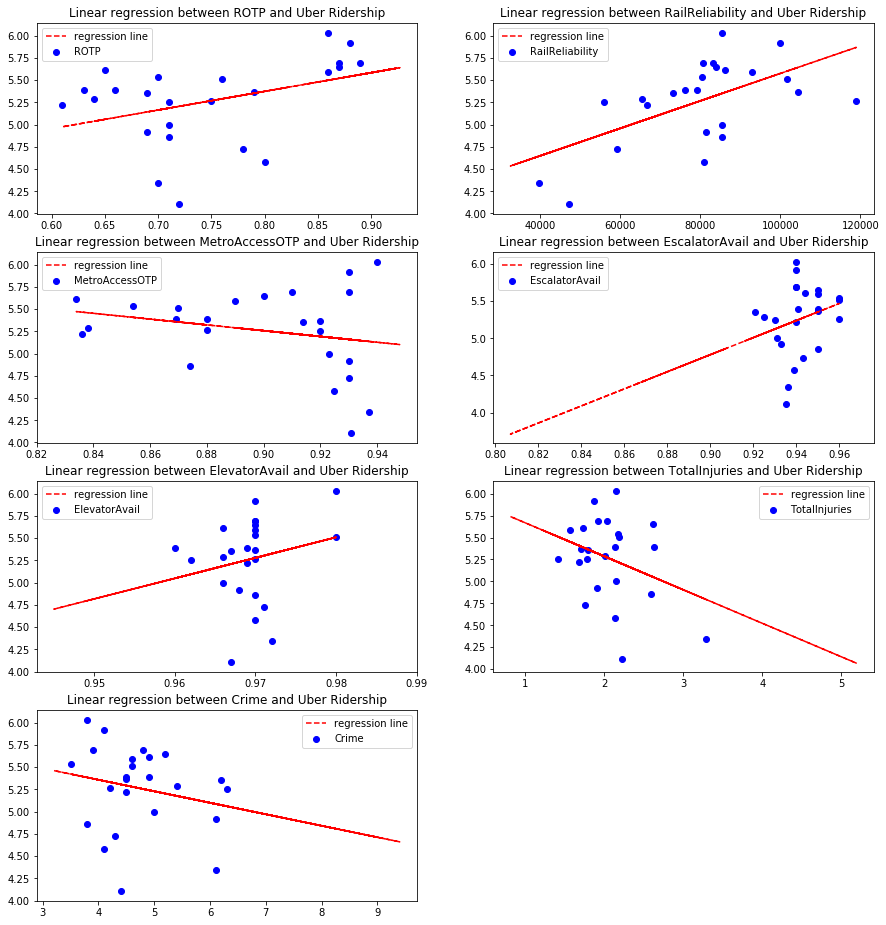

In [18]:
reg_data = {}
plt.figure(figsize=(15,33))
c = 1
for x in range(len(features)):
    if (features[x] != 'Date') & (features[x] != 'Bus') & (features[x] != 'Metro') & (features[x] != 'Taxi') & (features[x] != 'Uber'):
        
        reg_data[features[x]] = stats.linregress(df[features[x]][masks[x] & masks[4]],
                                                 df['Uber'][masks[x] & masks[4]])
        fit = (reg_data[features[x]][0] * df[features[x]]) + reg_data[features[x]][1]
        
        # Check if coefficients are correct
        plt.subplot(8,2,c)
        plt.scatter(df[features[x]], df['Uber'], label=(f'{features[x]}'), c='b')
        plt.plot(df[features[x]], fit, 'r--', label='regression line')
        plt.title(f'Linear regression between {features[x]} and Uber Ridership')
        plt.legend()
        c +=1
        

In [21]:
# Create DF to keep all regression coefficients
coef_df = pd.DataFrame(reg_data).transpose()
coef_df.columns = ['Slope', 'Intercept', 'R', 'P', 'StdError']
coef_df['Coef_determ'] = coef_df['R']**2
coef_df.to_csv('../../Report/Question_2/PNG/Uber_linear_regression_coeff_KPI.csv')
coef_df

,Slope,Intercept,R,P,StdError,Coef_determ
Crime,-0.129273,5.874933,-0.216421,0.309752,0.124332,0.046838
ElevatorAvail,23.108305,-17.136187,0.209150,0.326678,23.034923,0.043744
EscalatorAvail,11.495177,-5.565957,0.250566,0.237625,9.468953,0.062783
MetroAccessOTP,-3.255952,8.188108,-0.236287,0.266308,2.854636,0.055832
ROTP,2.097925,3.695175,0.385158,0.063084,1.071695,0.148347
RailReliability,0.000015,4.032169,0.582800,0.002802,0.000005,0.339656
TotalInjuries,-0.381424,6.048074,-0.327932,0.117726,0.234265,0.107539
